---

# CSCI 3202, Fall 2021
# Homework 2
# Due: Friday October 1, 2021 at 6:00 PM

<br> 

### Your name:

<br> 

---

Some useful packages and libraries:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats

---

## Problem 1 - Search Strategies


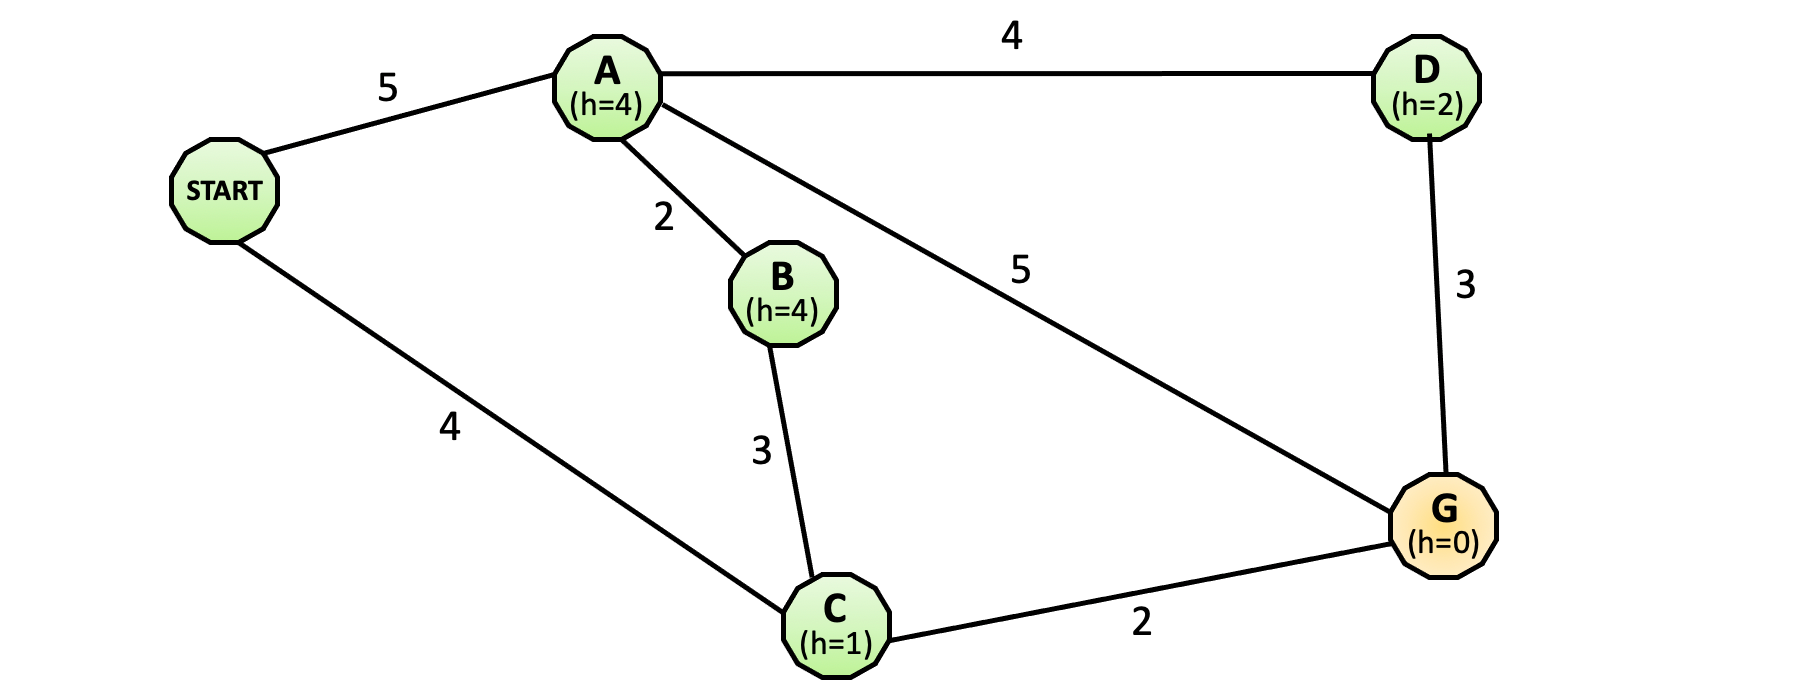

The graph above represents a portion of the CU Boulder campus. The nodes represent destinations and the edges represent walking paths between destinations. The edge weights show long it takes the average student to walk between the different parts of campus. 

For each of the following graph search strategies listed below, work out the path returned by graph search. Assume that your search will start on the "Start" node and terminate on the "G" node. Perform the goal tests at the appropriate times (either when nodes are generated or expanded) as we discussed in class. 

Assume ties resolve in such a way that states with earlier alphabetical order are expanded first. 

**Part A:** Depth First Search

**Solution:**
Path returned: Start-A-G

**Part B:** Breadth First Search

**Solution:** Path returned: Start-A-Goal

**Part C:** Uniform Cost Search

**Solution:** Path returned: Start-C-Goal

**Part D:** A* search with the heuristic values listed at each state.

**Solution:** Path returned: Start-C-Goal

---

## Problem 2 - Finding a Path through a Maze

Consider the maze shown below. Gray tiles represent walls and orange tiles represent open space where you can walk.

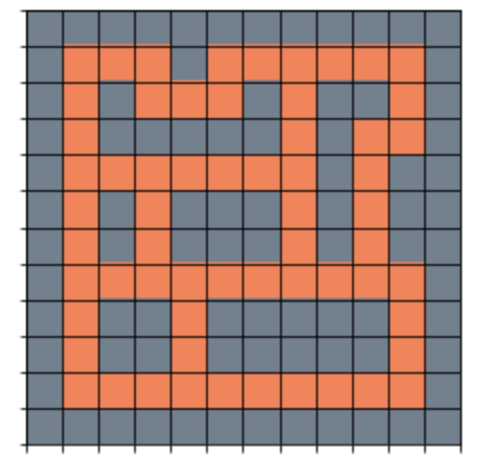

We can represent this maze using a binary `numpy` array as follows, where 1s represent walls and 0s represent open space and import necessary libraries for this assignment as:

In [2]:

maze = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
                 [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
                 [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
                 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

**Very importantly**, note that the *first* row of the **maze** array corresponds to the *bottom* row of tiles in the figure.  This is a choice made carefully to reflect the fact that we are going to search for a solution path through this maze in *physical* space, so it is useful for our coordinate system to match Cartesian coordinates. This is in contrast to using the first row of the **maze** array to represent the top of the maze, which looks intuitive.

### Useful helper routines for searching

In [3]:
def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs[path[s]][path[s+1]]
    return cost

**Part A:** Implement a function **breadth_first(start, goal, state_graph, return_cost)** to search the maze for a path from (1, 1) to (10,10). You may reuse your BFS code from HW1:
* **start**: initial state (e.g. (1,1))
* **end**: goal state (e.g. (10,10))
* **state_graph**: the dictionary defining the step costs 
* **return_cost**: logical input representing whether or not to return the solution path cost
  * If **True**, then the output should be a tuple where the first value is the list representing the solution path and the second value is the path cost
  * If **False**, then the only output is the solution path list object

Note that in the helper functions, two useful routines for obtaining your solution path are provided (and can be used for all the search algorithms):
  * **path(previous, s)**: returns a list representing a path to state **s**, where **previous** is a dictionary that maps predecessors (values) to successors (keys)
  * **pathcost(path, step_costs)**: adds up the step costs defined by the **step_costs** graph (e.g., `map_distances`) along the list of states **path**

In [4]:
# Solution:

def breadth_first(start, goal, state_graph, return_cost=False):
    ''' find a shortest sequence of states from start to the goal '''
    frontier = deque([start]) # doubly-ended queue of states
    previous = {start: None}  # start has no previous state; other states will
    if start == goal:
        path_out = [start]
        if return_cost: return path_out, pathcost(path_out, state_graph)
        return path_out
    while frontier:
        s = frontier.popleft()
        for s2 in state_graph[s]:
            if (s2 not in previous) and (s2 not in frontier):
                frontier.append(s2)
                previous[s2] = s
                if s2 == goal:
                    path_out = path(previous, s2)
                    if return_cost: return path_out, pathcost(path_out, state_graph)
                    return path_out

**Part B:** Implement a function **depth_first(start, goal, state_graph, return_cost)** to search the maze for a path from (1, 1) to (10,10). You may reuse your DFS code from HW1:
* **start**: initial state (e.g., (1,1))
* **end**: goal state (e.g., (10,10))
* **state_graph**: the dictionary defining the step costs (e.g., graph output from Part C)
* **return_cost**: logical input representing whether or not to return the solution path cost
    * If **True**, then the output should be a tuple where the first value is the list representing the solution path and the second value is the path cost
    * If **False**, then the only output is the solution path list objectDepth-first search

In [5]:
# Solution:

def depth_first(start, goal, state_graph, return_cost=False):
    ''' find a sequence of states from start to the goal '''
    frontier = [start] # regular Python list works as LIFO queue
    previous = {start: None}  # start has no previous state; other states will
    if start == goal:
        path_out = [start]
        if return_cost: return path_out, pathcost(path_out, state_graph)
        return path_out
    while frontier:
        s = frontier.pop()
        for s2 in state_graph[s]:
            if (s2 not in previous) and (s2 not in frontier):
                frontier.append(s2)
                previous[s2] = s
                if s2 == goal:
                    path_out = path(previous, s2)
                    if return_cost: return path_out, pathcost(path_out, state_graph)
                    return path_out

**Part C:** Write a function **maze_to_graph(maze)** that:
* takes as input a binary maze **maze**, stored as a `numpy` array, where 0 represents an open path and 1 represents a wall
* returns a graph dictionary
  * the keys are tuples giving the states (coordinate pairs) within the maze (e.g., (1,1) represents the lower-left open space, (2,1) represents the space **to the right** of (1,1), and (0,0) represents the lower-left corner, a wall location); thus, the coordinates within the maze are like Cartesian coordinates, and the x- and y-axes are the bottom and left walls of the maze, respectively
  * the values are themselves dictionaries, where the keys are other states within the maze and the values are the actions taken to move to that state
  * the actions are moves from the list ['N','S','E','W']
 
**Example:** The initial location (1, 1) is a key in the dictionary. Associated with (1, 1) are the "values" which takes the form of a dictionary specifying the neighbors of (1, 1) along with the relative cardinal direction. See the dictionary entries for (1, 1) and (1,2) below:

(1, 1): {(1, 2): 'N', (2, 1): 'E'}, 

(1, 2): {(1, 1): 'S', (1, 3): 'N'}

Your maze_to_graph function will return a graph that takes to form of a dictionary with entries specified for each tile that you can make moves on. Note that you can only move on orange tiles.

In [6]:
# Solution

def maze_to_graph(maze):
    ''' takes in a maze as a numpy array, converts to a graph '''
    # First we use Python's built in shape function to determine
    # how many rows and columns our maze matrix has. .shape returns
    # a tuple of rows X columns
    ny, nx = maze.shape
    # Next, we want to create a dictionary with all of the orange
    # spaces listed as the dictionary keys. We will assign each key
    # an empty dictionary as its initial value
    
    graph = {}
    
    for i in range(nx):
        for j in range(ny):
            # We only want to create an entry if the block contains a 0
            # maze[i,j] gives us the specific 0 or 1 code for each block
            # The indexing of maze is opposite of cartesian coordinates;
            if maze[j,i] == 0:
                graph[(i,j)] = {}
    for x, y in graph.keys():
        if y < ny-1 and maze[y+1,x] == 0:
            graph[(x, y)][(x, y + 1)] = "N"
            graph[(x, y + 1)][(x, y)] = "S"
            
        if x < nx-1 and maze[y, x+1] == 0:
            graph[(x, y)][(x + 1, y)] = "E"
            graph[(x + 1, y)][(x, y)] = "W"
            
    return graph

**Part D:** Use your **maze_to_graph** function and **depth-first search** to solve the maze defined above.  A simple 'print' statement of the path your codes find and its length suffices to display your solution.
* The initial state is (1,1)
* The goal state is (10,10)

Then, use your **breadth-first search** function to solve the maze; provide the solution path and its length.

If your codes are sufficiently general, the output from **maze_to_graph** should be suitable to be fed straight into your search routines.

In [7]:
# Solution:

g_maze = maze_to_graph(maze)

maze_sol_dfs = depth_first((1,1), (10,10), g_maze)
print('Depth-first search yields: {}, ({} steps)'.format(maze_sol_dfs, len(maze_sol_dfs)))

maze_sol_bfs = breadth_first((1,1), (10,10), g_maze)
print('Breadth-first search yields: {} ({} steps)'.format(maze_sol_bfs, len(maze_sol_bfs)))

Depth-first search yields: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 2), (10, 3), (10, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (10, 8), (10, 9), (10, 10)], (21 steps)
Breadth-first search yields: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (7, 10), (8, 10), (9, 10), (10, 10)] (19 steps)


**Part E:** Write a function **plot_maze(maze, path)** that takes as input a binary `numpy` array **maze** (1s represent walls, 0s represent open space) and a solution **path**, and plots the two together.
* **maze**: a maze represented as a binary `numpy` array, as above
* **path**: a solution path found using your search algorithms above. **path** should be consistent with the output from the **path** function below in the helpers (a list of states).  You may find it useful to provide a default of `None` for **path**, so that you can use your function to just plot a maze that you haven't solved yet.

Then, use your **plot_maze** function to plot the maze defined above, along with the solution paths found by **depth-first search** and **breadth-first search**. Plot your paths on two separate figures and label each one with the corresponding search technique.


<br>

**Potentially useful:** 

[1] In the helpers, you will notice that there are two packages imported:
  * `import matplotlib.pyplot as plt`
  * `from matplotlib import colors`

`pyplot` and `colors` may be potentially useful to you for generating a pretty plot and generating a colormap for your walls/open spaces in the maze, respectively.  You do not need to use them, but I wanted to provide this nudge for folks who maybe have not done much/any plotting in Python before.

[2] Also, [Color Oracle](http://colororacle.org/) is a useful utility for making colorblind-friendly plots. If you ever plan to show another human being a figure that you have generated, this is nice practice. Check it out!

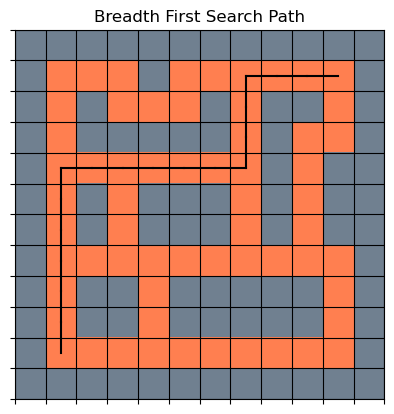

In [8]:
# Solution:

def plot_maze(maze, path=None):
    ''' visualize the binary `maze` (assumed numpy array) and solution `path` (if provided)'''

    nrow, ncol = maze.shape
    
    # create colormap
    cmap = colors.ListedColormap(['coral', 'slategray'])

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, origin='lower')
    
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k')
    ax.set_xticks(np.arange(-.5, ncol, 1))
    ax.set_yticks(np.arange(-.5, nrow, 1))
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    # now draw the solution path, if one is provided
    if path:
        for p in range(len(path)-1):
            point = path[p]
            nextpoint = path[p+1]
            plt.plot([point[0],nextpoint[0]], [point[1],nextpoint[1]], c='black')
    if path == maze_sol_bfs:
        ax.set_title("Breadth First Search Path")
    
    elif path == maze_sol_dfs:
        ax.set_title("Depth First Search Path")
    plt.show()
    
plot_maze(maze, path=maze_sol_bfs)

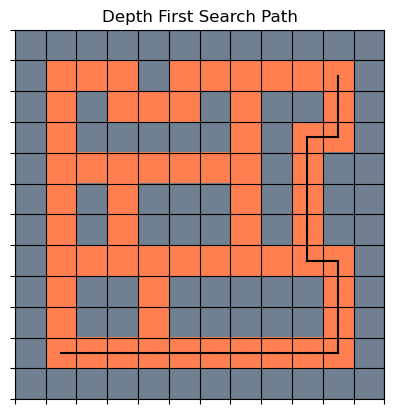

In [9]:
plot_maze(maze, path=maze_sol_dfs)

---

## Problem 3 - A* Search

You find yourself to be stranded in a haunted house. You would like to escape using the shortest route and avoiding all the obstacles (and well, also the 👻). In the figure below, notice the doors and blue lines. To move through the house from Entrance to Exit, you may traverse along the blue lines through doors as necessary.

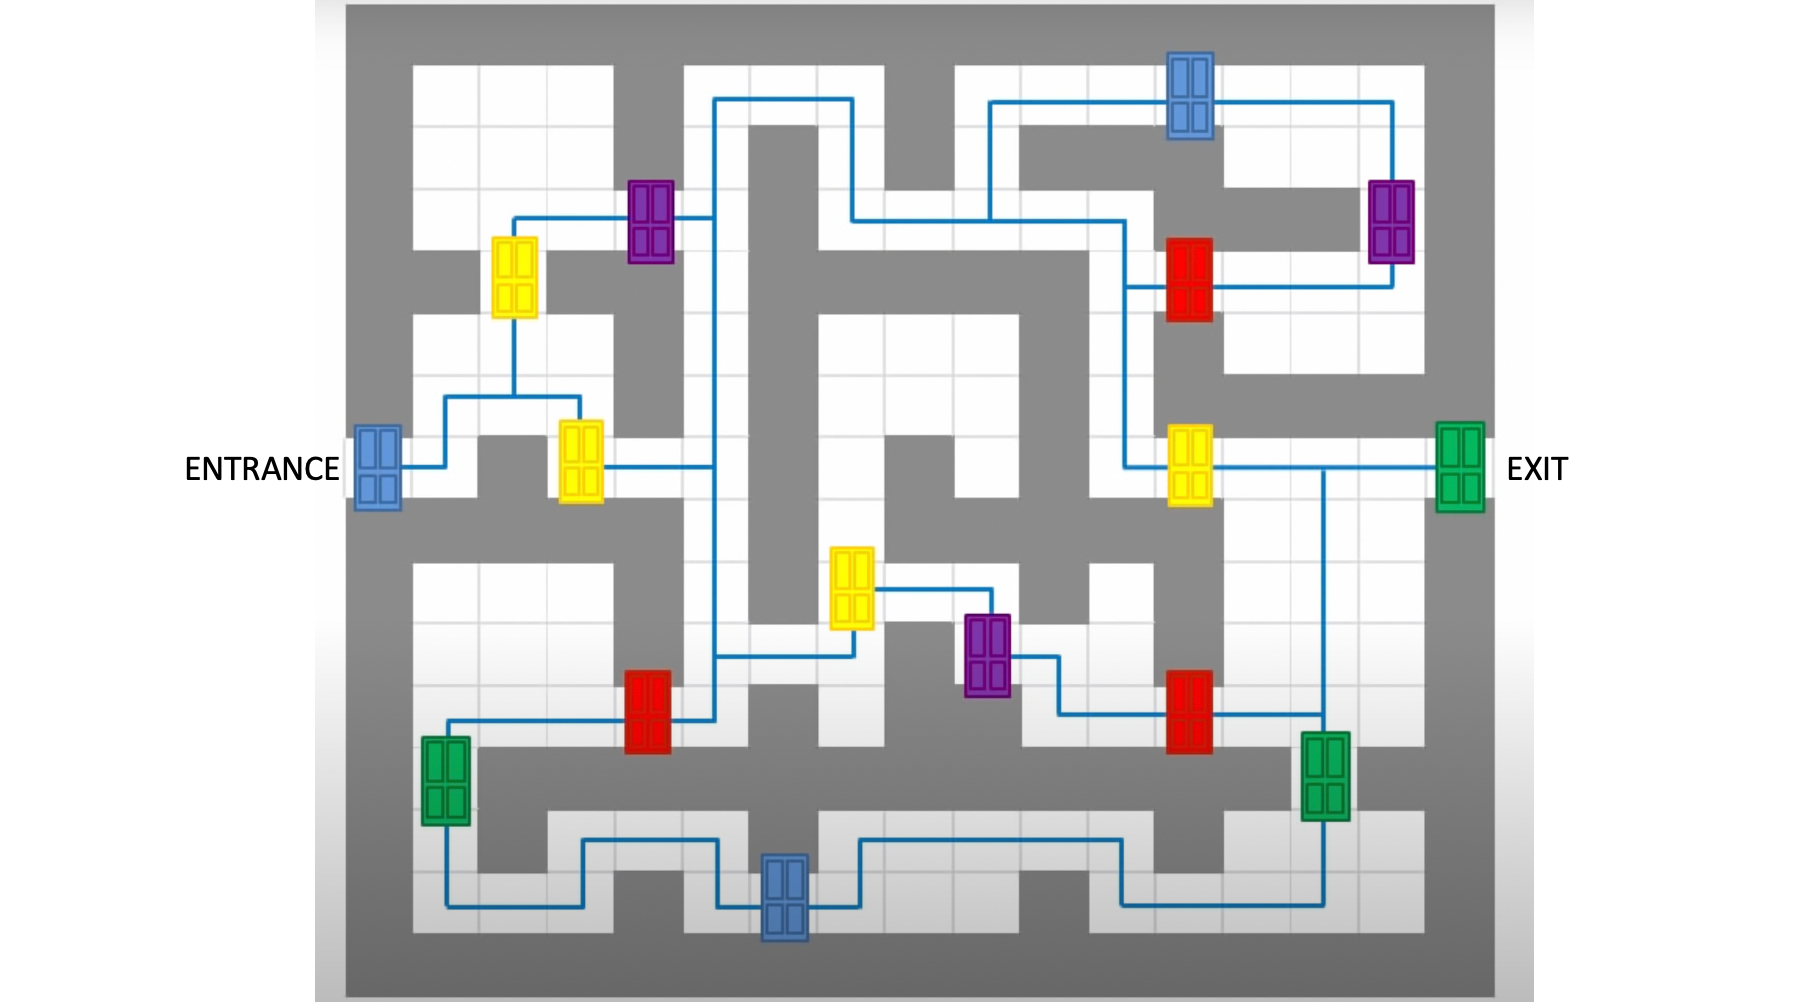


In order to begin converting this problem to something we can code using the A* search method, let's convert the map of the haunted house to a graph. The nodes represent the doors while the edges represent the original blue lines. Edge weights represent the step costs $g(n)$ between each set of nodes/doors. The edge weights represent the Manhattan distance between each set of doors.

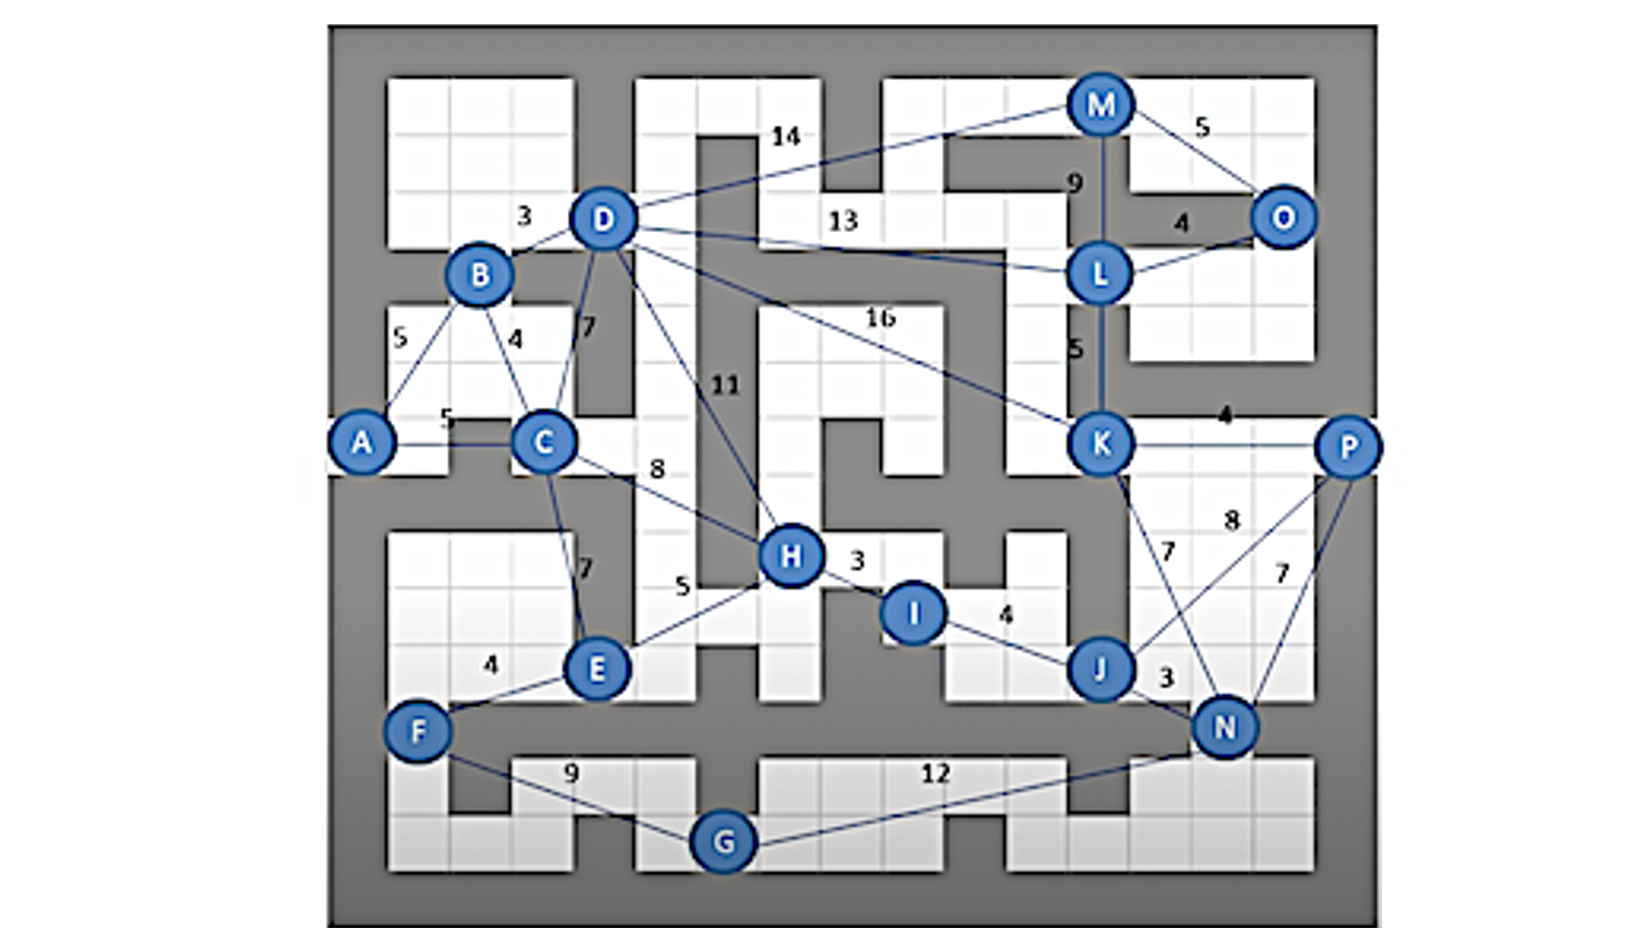


Next, we want to set up an admissible heuristic function and assign heuristic function values to each node.
 
See the updated graph below which includes the heuristic values for each node.
You will need to implement A* search to find the shortest path from A to P in order to escape.
Use the following graph to answer the following questions:

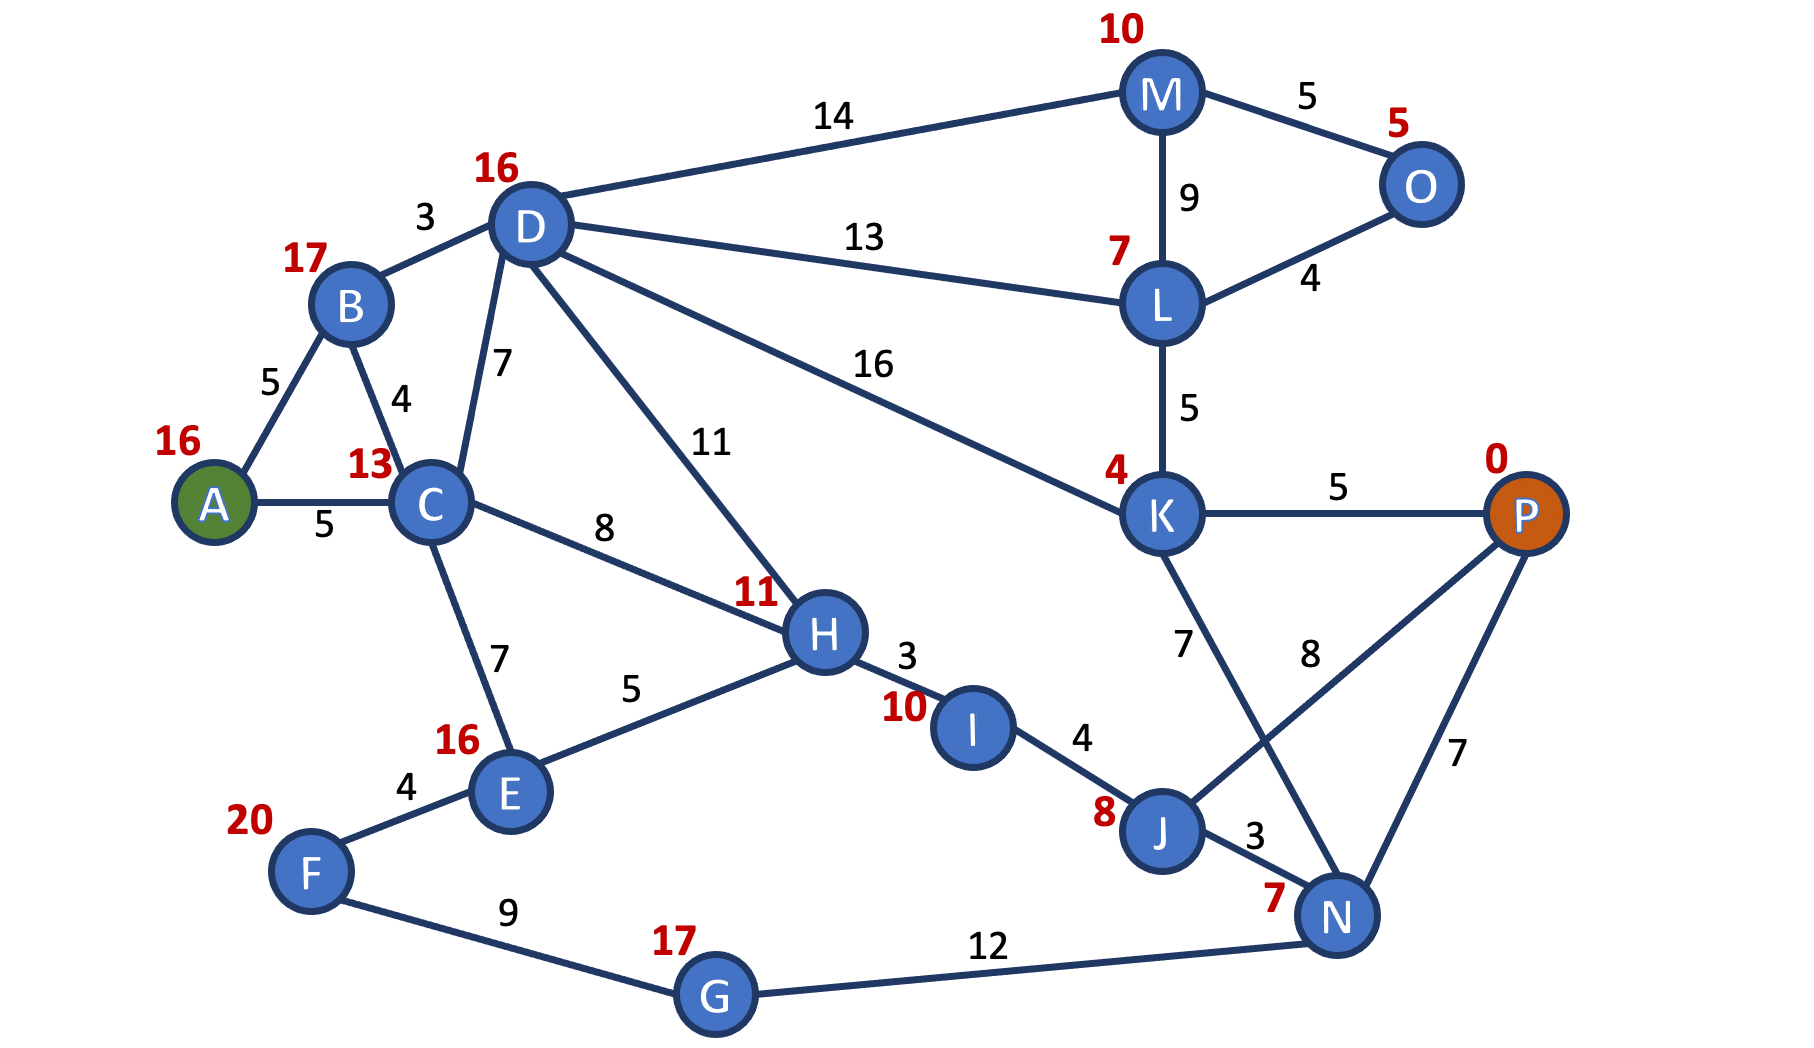



**Part A:** Go through the $A*$ algorithm by hand to determine the path that should be taken from $A$ to $P$. Fill in the table below to show the updated explored set and frontier with each iteration. The first iteration is done for you so that you can see the notation that is expected. If there are any ties, break them in alphabetical order.

| Explored Nodes | Frontier Nodes/Paths & f values  |
| :- | -: |
| $\{ \}$ | $[(A,16)]$ |
| $\{A\}$ | $[(A-B,22),(A-C,18)]$ |
| $\{A, C\}$ | $[(AB,22),(ACD,28),(ACE,28),(ACH,24)]$ |
| $\{A, C, B\}$ | $ [(ABD,24),(ACE,28),(ACH,24)] $ |
| $\{A, C, B, D \}$ |$ [(ACE,28),(ACH,24),(ABDM,32),(ABDL,28), (ABDK, 28)] $ |
| $\{A, C, B, D, H \}$ | $[(ACE,28),(ABDM,32),(ABDL,28), (ABDK, 28),(ACHI,26)] $ |
|$\{A,C,B,D,H,I\}$ |$[(ACE,28),(ABDM,32),(ABDL,28), (ABDK, 28),(ACHIJ,28)] $ |
|$\{A,C,B,D,H,I,E\}$ | $[(ABDM,32),(ABDL,28), (ABDK, 28),(ACHIJ,28),(ACEF,36)] $ |
|$\{A,C,B,D,H,I,E,J\}$ | $[(ABDM,32),(ABDL,28), (ABDK, 28),(ACEF,36),(ACHIIJN,30),(ACHIJP,28)] $ |
|$\{A,C,B,D,H,I,E,J,K\}$ | $[(ABDM,32),(ABDL,28),(ACEF,36),(ACHIIJN,30),(ACHIJP,28)]$ |
|$\{A,C,B,D,H,I,E,J,K,L\}$ | $[(ABDM,32),(ACEF,36),(ACHIIJN,30),(ACHIJP,28),(ABDLO,30)]$ |
|$\{A,C,B,D,H,I,E,J,K,L,P\}$| ...we can declare success! |

$A*$ finds the path: $A-C-H-I-J-P$, which has a path cost of 28, the minimum cost path that is possible!

**Part B:** Now, use the graph from the 3rd figure to make *two dictionaries. *

1) Name the first dictionary `haunted_house_map` and make a dictionary of dictionaries similar to the `map_times` dictionary from HW1. The value associated with each node in this dictionary should represent the step cost between nodes ($g(n)$). The `map_times` dictionary is shown in the cell below for your convenience. Subsequent code should not be accessing this dictionary, it's purely there to help you with syntax.

2) The second dictionary `haunted_heuristic` needs to include the heuristic values for each node. To be more specific, `haunted_heuristic` should have the nodes as the keys with the orange heuristic values entered as the value of each key.

Note, the helper routine `check_map` is also in the cell below. You may find it useful to have. You should not need to modify it.

In [10]:
###########################################################
# The map_times dictionary is left here as a syntax example.
map_times = dict(
    chi=dict(det=280, cle=345, ind=200),
    cle=dict(chi=345, det=170, col=155, pit=145, buf=185),
    ind=dict(chi=200, col=175),
    col=dict(ind=175, cle=155, pit=185),
    det=dict(chi=280, cle=170, buf=270),
    buf=dict(det=270, cle=185, pit=215, syr=145),
    pit=dict(col=185, cle=145, buf=215, phi=305, bal=255),
    syr=dict(buf=145, phi=245, new=260, bos=290),
    bal=dict(phi=145, pit=255),
    phi=dict(pit=305, bal=145, syr=245, new=150),
    new=dict(syr=260, phi=150, bos=270, pro=260),
    pro=dict(bos=90, new=260),
    bos=dict(pro=90, new=270, syr=290, por=120),
    por=dict(bos=120))
###########################################################


haunted_house_map = dict(A=dict(B=8,C=8),B=dict(D=12),C=dict(E=4,F=9),
                         D=dict(F=6,G=6),E=dict(D=4),
                         F=dict(G=9),G=dict())

haunted_heuristic = dict(A=20, B=14, C=13, D=6, E=10, F=8, G=0)

def check_map(step_costs):
    ''' function to check if all the path costs are at least symmetric '''
    check_states = []
    for state1 in step_costs.keys():
        for state2 in step_costs[state1].keys():
            uh_oh = step_costs[state2][state1]!=step_costs[state1][state2]
            if uh_oh:
                print('Check the costs between states {} and {}'.format(state1,state2))
                check_states.append([state1,state2])
    if len(check_states)==0:
        print('all okay! (symmetric at least)')
    return check_states

**Part C:** Modify your code for uniform-cost search from Homework 1 so that it provides optionally as output the number of nodes **expanded** in completing the search. The `Frontier_PQ` class is provided here for you. You are welcome to use either your own uniform cost code from HW1 or the solutions version. You will need to make the new modification described here regardless of which code you use.

Include a new optional logical (True/False) argument **return_nexp**, so your function calls to the new uniform cost search will look like: `uniform_cost(start, goal, state_graph, return_cost, return_nexp)`.
* If `return_nexp` is True, then the last output in the output tuple should be the number of nodes expanded.
* If `return_nexp` is False, then the code should behave exactly as it did in Homework 2.

Then, verify that your revised codes are working by checking the route from `A` to `P`. Include the number of nodes expanded and the path cost (using `haunted_house_map`). As a sanity check, your code should find the same path that you found by hand in **Part A**.

In [11]:
# Solution:

class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    
    def __init__(self, start, cost):
        self.states = {}
        self.q = []
        self.add(start, cost)
        
    def add(self, state, cost):
        ''' push the new state and cost to get there onto the heap'''
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
        self.states.pop(state)    # and remove from frontier
        return (cost, state)

    def replace(self, state, cost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return

def uniform_cost(start, goal, state_graph, return_cost=False, return_nexp=True):
    frontier = Frontier_PQ(start, 0)
    previous = {start : None}
    explored = {}
    n_exp = 0
    while frontier:
        s = frontier.pop()
        print(s)
        n_exp += 1
        #print('exploring {}'.format(s[1]))
        if s[1] == goal:
            if return_cost: return (path(previous, s[1]), s[0], n_exp) if return_nexp else (path(previous, s[1]), s[0])
            return path(previous, s[1])
        explored[s[1]] = s[0]
        for s2 in state_graph[s[1]]:
            newcost = explored[s[1]] + state_graph[s[1]][s2]
            if (s2 not in explored) and (s2 not in frontier.states):
                frontier.add(s2, newcost)
                previous[s2] = s[1]
            elif (s2 in frontier.states) and (frontier.states[s2] > newcost):
                frontier.replace(s2, newcost)
                previous[s2] = s[1]
                
print(uniform_cost('A','G', haunted_house_map, True, True))

(0, 'A')
(8, 'B')
(8, 'C')
(12, 'E')
(16, 'D')
(17, 'F')
(22, 'G')
(['A', 'C', 'E', 'D', 'G'], 22, 7)


**Part D:** Heuristic function

Define a function to take as an argument the `state` that you are in (node on our graph), and return as output the value of the heuristic, between your `state` and `P`.  Note that your function should be quite short, and amounts to looking up the proper value from the `haunted_heuristic` dictionary defined in **Part B**..  Call this function `heuristic_haunted_heuristic`.

In [12]:
# Solution: Define a heuristic function

def heuristic_haunted_heuristic(state):
    return haunted_heuristic[state]

**Part E:** Full-blown A\* search

Modify your uniform-cost search codes from **(4c)** even further so that they now perform **A\* search**, using as the heuristic function the orange values associated with each node from our haunted house graph.

Provide `heuristic` as an additional argument, which should just be the function name to call within the A\* code. So your call to the A\* routine should look like:  `astar_search(start, goal, state_graph, heuristic, return_cost, return_nexp)`.  (This kind of modular programming will make it much easier to swap in alternative heuristic functions later, and also helps to facilitate debugging if something goes wrong.)

In [26]:
# Solution:

def astar_search(start, goal, state_graph, heuristic, return_cost=False, return_nexp=False):
    '''A* search from `start` to `goal`
    start = initial state
    goal = goal state
    heuristic = function for estimated cost to goal (function name)
    return_cost = logical (True/False) for whether or not to return the total path cost
    return_nexp = logical (True/False) for whether or not to return the number of nodes expanded
    '''         
    frontier = Frontier_PQ(start, 0)
    previous = {start : None}
    explored = {}
    n_exp = 0
    while frontier:
        #print(frontier)
        print(explored)
        s = frontier.pop()
        n_exp += 1
        #print('exploring {}'.format(s[1]))
        if s[1] == goal:
            if return_cost:
                if return_nexp:
                    return (path(previous, s[1]), pathcost(path(previous, s[1]), state_graph), n_exp)
                    #return (path(previous, s[1]), pathcost(path(previous, s[1]), state_graph), len(explored))
                else:
                    return (path(previous, s[1]), pathcost(path(previous, s[1]), state_graph))
            else:
                if return_nexp:
                    return (path(previous, s[1]), n_exp)
                else:
                    return path(previous, s[1])
        explored[s[1]] = pathcost(path(previous, s[1]), state_graph)
        for s2 in state_graph[s[1]]:
            newcost = explored[s[1]] + state_graph[s[1]][s2] + heuristic(s2)
            if (s2 not in explored) and (s2 not in frontier.states):
                frontier.add(s2, newcost)
                previous[s2] = s[1]
            elif (s2 in frontier.states) and (frontier.states[s2] > newcost):
                frontier.replace(s2, newcost)
                previous[s2] = s[1]

**Part F:** Use your A\* search code from **(4c)** to find the optimal path through the haunted house from `A` to `P`.  Print to the screen the following:
1. the optimal path
2. the optimal path cost (miles traveled)
3. the number of states expanded during the A\* search

Additionally, show below how many states must be expanded to find the optimal path from `A` to `P` using the regular old uniform-cost search algorithm from **(4a)**.  Comment on the difference in states that must be explored by each algorithm.

**Sanity check:** No matter what your `start` and `goal` states are, how should the output from `astar_search` and `uniform_cost` search compare?

In [14]:
# Solution:

start = 'A'
goal = 'G'
print(astar_search(start, goal, haunted_house_map, heuristic_haunted_heuristic, return_cost=True, return_nexp=True))
print(uniform_cost(start, goal, haunted_house_map, return_cost=True, return_nexp=True))

{}
{'A': 0}
{'A': 0, 'C': 8}
{'A': 0, 'C': 8, 'B': 8}
{'A': 0, 'C': 8, 'B': 8, 'E': 12}
{'A': 0, 'C': 8, 'B': 8, 'E': 12, 'D': 16}
(['A', 'C', 'E', 'D', 'G'], 22, 6)
(0, 'A')
(8, 'B')
(8, 'C')
(12, 'E')
(16, 'D')
(17, 'F')
(22, 'G')
(['A', 'C', 'E', 'D', 'G'], 22, 7)


**Solution:**

Uniform-cost search explored more states, which makes sense, because it is uninformed and searching in all directions only based on how far those states are from the initial state.

**Part G:** How many states are expanded by each of A\* search and uniform cost search, to find the optimal path **from `H` to `P`**? List the explored states for A\* and uniform cost. You may either do this by hand or turn on a print statement in your code above.

In [15]:
# Solution:

start = 'A'
goal = 'G'
print(astar_search(start, goal, haunted_house_map, heuristic_haunted_heuristic, return_cost=True, return_nexp=True))
print(uniform_cost(start, goal, haunted_house_map, return_cost=True, return_nexp=True))

{}
{'A': 0}
{'A': 0, 'C': 8}
{'A': 0, 'C': 8, 'B': 8}
{'A': 0, 'C': 8, 'B': 8, 'E': 12}
{'A': 0, 'C': 8, 'B': 8, 'E': 12, 'D': 16}
(['A', 'C', 'E', 'D', 'G'], 22, 6)
(0, 'A')
(8, 'B')
(8, 'C')
(12, 'E')
(16, 'D')
(17, 'F')
(22, 'G')
(['A', 'C', 'E', 'D', 'G'], 22, 7)


You should find that uniform cost search has explored more states than A\* search.  

---

## Problem 4 - More Heuristics & A* Search!

### 8-tile puzzle

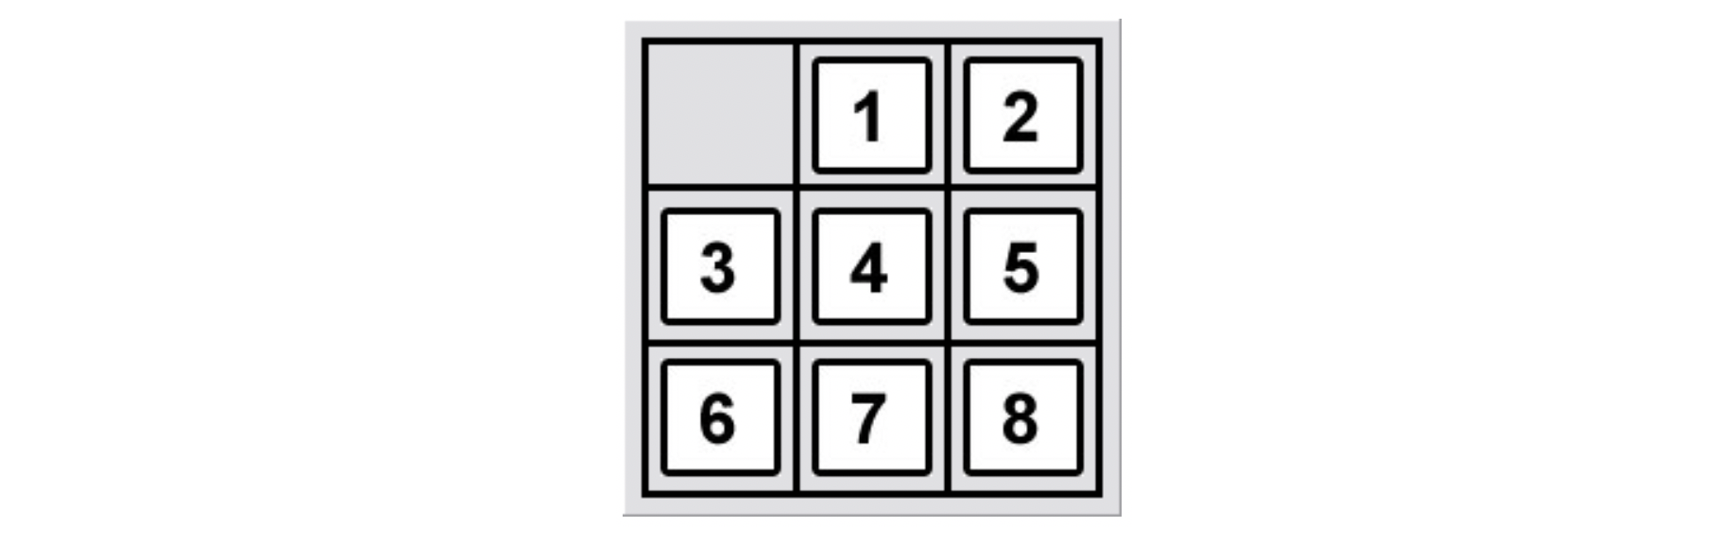

Consider the 8-tile puzzle, as discussed in class.  The goal state is illustrated in the figure above, and the rest of the state space is obtained by sliding a numbered tile in the plane of the puzzle into the blank spot.  We can use a 0 to represent the blank space, and represent the state of an 8-tile puzzle board as a `numpy` array as follows:

In [16]:
goal = np.array([[0,1,2],[3,4,5],[6,7,8]])
print('Goal state is:\n{}'.format(goal))

Goal state is:
[[0 1 2]
 [3 4 5]
 [6 7 8]]


**Part A:** Design two heuristic functions to return the **Manhattan distance** heuristic and the **number of misplaced tiles** heuristic.  These functions should be called `heuristic_manhattan` and `heuristic_misplaced`, and:
* take two `numpy` array arguments, `state` and `goal`
* `state` is the current state of an 8-tile board,
* `goal` is the goal state to measure against,
* return the appropriate heuristic value (Manhattan distance or misplaced tiles) for the "distance" of the given `state` to the `goal`

In [17]:
# Solution:

def heuristic_manhattan(state, goal):
    '''calculates the manhattan distance from the current state to the goal'''
    dist = 0
    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            if goal[i,j]!=0:
                tile = goal[i,j]
                loc = np.where(state==tile)
                dist += np.abs(i-int(loc[0])) + np.abs(j-int(loc[1]))
    return dist

def heuristic_misplaced(state, goal):
    '''calculates the number of misplaced tiles from current state to the goal'''
    dist = 0
    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            if goal[i,j]!=0:
                tile = goal[i,j]
                loc = np.where(state==tile)
                dist += 0 if int(loc[0])==i and int(loc[1])==j else 1
    return dist

**Part B:** 

#### Is this puzzle even solvable??

It turns out that some arrangements of those 8 tiles are not possible to solve into the `goal` state given above. We would like to be able to check whether or not a given 8-tile puzzle board is solvable.

Suppose you take the tiles of any given 8-tile puzzle board and arranged them in a single row, with the first row coming in order first, then the second row in order, and finally the third row in order.  So the goal state would be [1,2,3,4,5,6,7,8]. Another possible state is:

In [18]:
state_test = np.array([[1,4,2],[3,0,5],[6,7,8]])

The state `state_test` is found by sliding the 1 tile to the blank spot, then sliding the 4 tile up to take the position formerly occupied by the 1 tile.  When we rearrange this state into a row, we obtain [1,4,2,3,5,6,7,8].

We define an **inverted tile pair** to be a pair of tiles in the row representation of the puzzle that is out of order relative to the goal state. That is, each occurrence of a tile that has a higher value than another tile later in the row counts as an inversion.  So `state_test` has **two** inversions:  4 and 2, and 4 and 3.

We define the **parity** of an 8-tile board from the number of inversions in the puzzle board.  So `state_test` has 2 inversions, and the `goal` has 0. Note that both 0 and 2 are **even** numbers. An 8-tile puzzle board may be rearranged (within the rules of the game) into another board if the two boards have the same parity, i.e. they must both be even or both be odd. In order to rearrange a board into the goal state, you only need to consider boards with an even parity. So it would be very handy if we had a function to check whether or not an arbitrary arrangement of those 8 tiles can be solved for a given `goal` state.

Write a function `check_parity(state1, state2)`:
* take as arguments two `numpy` arrays representing 8-tile boards, `state1` and `state2`
* return `True` if the two boards have the same parity (both even or both odd) and `False` otherwise

In [19]:
# Solution:

def check_parity(state1, state2):
    '''checks to see if the parity of the two states is the same
    the 8-tile problem will not be solvable if they are not'''
    # (# inverted tile pairs) + (row # of empty square, if even # rows)
    parity1 = 0
    parity2 = 0
    # check row of empty square IF grid width is even
    if state1.shape[0]%2==0:
        parity1 += int(np.where(state1==0)[0])
        parity2 += int(np.where(state2==0)[0])
    # convert to lists
    length = state1.shape[0]*state1.shape[1]
    s1 = list(state1.reshape((1,length))[0])
    s2 = list(state2.reshape((1,length))[0])
    # remove the blank tile (0)
    s1.remove(0)
    s2.remove(0)
    # check number of inverted tile pairs
    for k in range(length-1):
        parity1 += np.sum(s1[k] - s1[k:] > 0)
        parity2 += np.sum(s2[k] - s2[k:] > 0)    
    return parity1%2==parity2%2

**Part C:** Thinking back to HW1, the `map_distances` and `map_times` graphs were nicely defined. This meant that finding the successors of a given city in the route-finding homework problems amounted to looking up the values of that key in a dictionary. For the 8-tile problem, however, we do **not** want to try to build the entire state space graph in memory! Even if we can, it's just such a pain.

Instead, let's write a function `adjacent_states`:
* take a single input argument `state`, which is a `numpy` array representing an 8-tile board arrangement
* return as output a list of `numpy` arrays that are the states one move away from the input `state`

For example, if you run `adjacent_states(goal)`, the expected output should be

`[array([[3, 1, 2], [0, 4, 5], [6, 7, 8]]),
 array([[1, 0, 2], [3, 4, 5], [6, 7, 8]])]`

which are the states obtained from the `goal` state by sliding the 3 tile up and by sliding the 1 tile to the left, respectively.

In [20]:
# Solution:

def adjacent_states(state):
    '''what are all the successors of this state? depends on location of the 0 (blank tile)'''
    adjacent = []
    loc0 = [int(np.where(state==0)[i]) for i in range(2)]
    if loc0[0] > 0:
        # If row of 0 is > 0, then we can move 0 up
        swap = np.copy(state)
        newloc = [loc0[0]-1, loc0[1]]
        swap[loc0[0], loc0[1]] = state[newloc[0], newloc[1]]
        swap[newloc[0], newloc[1]] = 0
        adjacent.append(swap)
    if loc0[0] < (state.shape[0]-1):
        # If row of 0 is not bottom, then can move 0 down
        swap = np.copy(state)
        newloc = [loc0[0]+1, loc0[1]]
        swap[loc0[0], loc0[1]] = state[newloc[0], newloc[1]]
        swap[newloc[0], newloc[1]] = 0
        adjacent.append(swap)
    if loc0[1] > 0:
        # If column of 0 is > 0, then we can move 0 left
        swap = np.copy(state)
        newloc = [loc0[0], loc0[1]-1]
        swap[loc0[0], loc0[1]] = state[newloc[0], newloc[1]]
        swap[newloc[0], newloc[1]] = 0
        adjacent.append(swap)
    if loc0[1] < (state.shape[1]-1):
        # If column of 0 is not far-right, then we can move 0 right
        swap = np.copy(state)
        newloc = [loc0[0], loc0[1]+1]
        swap[loc0[0], loc0[1]] = state[newloc[0], newloc[1]]
        swap[newloc[0], newloc[1]] = 0
        adjacent.append(swap)
    return adjacent

**Part D:** Modify your **A\* search** from above so that instead of looking in the graph`haunted_house_map` for the successor states, it generates them on the fly using your shiny new `adjacent_states` routine from **(4c)**. 

Some notes:
* You may run into some problems with using the `numpy` arrays to represent states. One potential solution is to convert these arrays to/from tuples, as needed. This is not the only solution.
* When you start to test your code, be sure to begin with simple test cases that you know are only a few moves away from the goal state.
* Be sure to implement a check to make sure the initial state is solvable for the given goal state!  And do not hard-code the goal state given above.
* You may need to modify how path costs are added up and returned. The returned cost of the solution path ought to be the number of **moves** needed to solve the puzzle, which is one less than the number of states on the solution path.
* Depending on how you implemented your Frontier Priority Queue, you may or may not need to make modifications to it. My implementation did not require any modification.

In [21]:
# Solution:

class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    
    def __init__(self, start, cost):
        self.states = {}
        self.q = []
        self.add(start, cost)
        
    def add(self, state, cost):
        ''' push the new state and cost to get there onto the heap'''
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
        self.states.pop(state)    # and remove from frontier
        return (cost, state)

    def replace(self, state, cost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return

# Solution:

def astar_search(start, goal, heuristic, return_cost=False, return_nexp=False):
    '''A* search from `start` to `goal`
    start = initial state
    goal = goal state
    heuristic = function for estimated cost to goal (function name)
    return_cost = logical (True/False) for whether or not to return the total path cost
    return_nexp = logical (True/False) for whether or not to return the number of nodes explored
    '''
    # check that the initial state is even solvable
    if not check_parity(start, goal):
        print('Error: initial state cannot be solved for goal state (unmatched parities)')
        return None

    # numpy arrays aren't hashable - convert to tuples
    start = tuple(map(tuple,start))
    goal = tuple(map(tuple,goal)) 

    frontier = Frontier_PQ(start, 0)
    previous = {start : None}
    explored = {}
    n_exp = 0
    while frontier:
        s = frontier.pop()
        n_exp += 1
        if s[1] == goal:
            if return_cost: return (path(previous, s[1]), s[0], n_exp) if return_nexp else (path(previous, s[1]), s[0])
            return path(previous, s[1])
        explored[s[1]] = len(path(previous, s[1]))-1   # -1 to offset the initial state (so lowest path cost is 0)
        adjacent = adjacent_states(np.asarray(s[1]))
        for s2 in adjacent:
            s2 = tuple(map(tuple,s2))
            newcost = explored[s[1]] + 1 + heuristic(np.asarray(s2), np.asarray(goal))
            if (s2 not in explored) and (s2 not in frontier.states):
                frontier.add(s2, newcost)
                previous[s2] = s[1]
            elif (s2 in frontier.states) and (frontier.states[s2] > newcost):
                frontier.replace(s2, newcost)
                previous[s2] = s[1]

In [22]:
goal = np.array([[0,1,2],[3,4,5],[6,7,8]])
state_test = np.array([[1,4,2],[3,5,8],[6,7,0]])
moves, cost, nexp = astar_search(state_test, goal, heuristic_manhattan, return_cost=True, return_nexp=True)
print(moves,cost,nexp)

[((1, 4, 2), (3, 5, 8), (6, 7, 0)), ((1, 4, 2), (3, 5, 0), (6, 7, 8)), ((1, 4, 2), (3, 0, 5), (6, 7, 8)), ((1, 0, 2), (3, 4, 5), (6, 7, 8)), ((0, 1, 2), (3, 4, 5), (6, 7, 8))] 4 5


In [23]:
goal = np.array([[7,0,2],[4,3,5],[6,1,8]])
state_test = np.array([[1,4,2],[3,5,8],[6,7,0]])
moves, cost, nexp = astar_search(state_test, goal, heuristic_manhattan, return_cost=True, return_nexp=True)
print(moves,cost,nexp)


[((1, 4, 2), (3, 5, 8), (6, 7, 0)), ((1, 4, 2), (3, 5, 0), (6, 7, 8)), ((1, 4, 2), (3, 0, 5), (6, 7, 8)), ((1, 4, 2), (3, 7, 5), (6, 0, 8)), ((1, 4, 2), (3, 7, 5), (0, 6, 8)), ((1, 4, 2), (0, 7, 5), (3, 6, 8)), ((0, 4, 2), (1, 7, 5), (3, 6, 8)), ((4, 0, 2), (1, 7, 5), (3, 6, 8)), ((4, 7, 2), (1, 0, 5), (3, 6, 8)), ((4, 7, 2), (0, 1, 5), (3, 6, 8)), ((4, 7, 2), (3, 1, 5), (0, 6, 8)), ((4, 7, 2), (3, 1, 5), (6, 0, 8)), ((4, 7, 2), (3, 0, 5), (6, 1, 8)), ((4, 7, 2), (0, 3, 5), (6, 1, 8)), ((0, 7, 2), (4, 3, 5), (6, 1, 8)), ((7, 0, 2), (4, 3, 5), (6, 1, 8))] 15 74


**Part E:** Generate 8-tile puzzles varying in complexity in number of moves for the optimal solution, ranging from 10 moves to at least 25 moves.  Use the `generate_puzzle` function below to accomplish this. (No modification of this function is necessary.)

***Then:***
Solve each puzzle twice using A\* search:  once using the Manhattan distance heuristic, and once using the misplaced tiles heuristic.  Keep track of:
1. the number of moves in the optimal solution path for each puzzle,
2. the number of states explored by A\* search using the Manhattan distance heuristic, and
3. the number of states explored by A\* search using the number of misplaced tiles heuristic.


In [24]:
def generate_puzzle(goal, n_moves=4):
    '''generate an 8-tile puzzle solve-able in n_moves from goal'''
    puzzle = np.copy(goal)
    previous = [goal]
    for k in range(n_moves):
        adjacent = adjacent_states(puzzle)
        ind_pop = []
        for a in range(len(adjacent)):
            if any((previous_state==adjacent[a]).all() for previous_state in previous):
                ind_pop.append(a)
        if ind_pop:
            ind_pop.reverse()
            [adjacent.pop(i) for i in ind_pop];
        puzzle = adjacent[np.random.randint(len(adjacent))]
        previous.append(puzzle)
    return puzzle, previous



In [25]:
# Solution:

moves = []
solve_manhattan = []
solve_misplaced = []
for m in list(range(10, 28)):
    puzzle, previous = generate_puzzle(goal, n_moves=m)
    solve = astar_search(puzzle, goal, heuristic_manhattan, return_cost=True, return_nexp=True)
    moves.append(solve[1])
    solve_manhattan.append(solve[2])
    solve_misplaced.append(astar_search(puzzle, goal, heuristic_misplaced, return_cost=True, return_nexp=True)[2])

ValueError: high <= 0

Now generate a plot of the number of states explored by A\* search using each heuristic, as a function of the number of moves along the optimal solution path. Be sure to label everything clearly.  Write a sentence or two to comment on what you notice, and whether or not it is consistent with what we saw in class.

In [ ]:
plt.scatter(moves, solve_manhattan, label='Manhattan')
plt.scatter(moves, solve_misplaced, label='Misplaced')
plt.xlabel('Number of moves for optimal solution')
plt.ylabel('Number of nodes explored')
plt.legend()
plt.show()

**Solution:**

The Manhattan distance heuristic **dominates** the Misplaced Tiles heuristic. We see this because the misplaced tiles heuristic explores thousands more states than the Manhattan distance heuristic - it's especially noticable for the >20 moves puzzles.